In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [11]:
path = '/data/dac/dedupe-project/openmap-us.csv'
df = pd.read_csv(path, header=None).iloc[:, 1]
# path = "/data/dac/dedupe-project/22Jul19_database.xlsx"
# df = pd.read_excel(path).loc[:, "address"]
df = df.str.lower().str.replace("\n", " ").str.replace(r"[ ]+", " ", regex=True)

# First Look
We are trying to examing the overiew of data:
1. Total length
2. Duplicate samples
3. Total length after sampling
4. 

In [29]:
path = "/data/dac/dedupe-project/22Jul19_database.xlsx"
df = pd.read_excel(path)
df.shape

(7716, 8)

In [99]:
df['country']

0       CN
1       CN
2       CN
3       CN
4       CN
        ..
7711    TH
7712    CN
7713    CN
7714    CN
7715    DE
Name: country, Length: 7716, dtype: object

In [106]:
countries = []
values = []
country_portion = [(value*100/len(df), name) for name, value in df.groupby('country')['id'].count().items()]

In [109]:
sorted(country_portion, key = lambda x: x[0], reverse=True)

[(54.3286677034733, 'CN'),
 (15.746500777604977, 'US'),
 (8.981337480559876, 'VN'),
 (4.017625712804562, 'IN'),
 (3.3825816485225504, 'BD'),
 (2.4105754276827374, 'ID'),
 (1.516329704510109, 'KH'),
 (1.503369621565578, 'KR'),
 (0.8942457231726283, 'GT'),
 (0.7905650596163816, 'MX'),
 (0.7776049766718507, 'PK'),
 (0.5443234836702955, 'TW'),
 (0.5313634007257646, 'CH'),
 (0.4276827371695179, 'TH'),
 (0.40176257128045617, 'NI'),
 (0.40176257128045617, 'PH'),
 (0.3499222395023328, 'LK'),
 (0.28512182477967857, 'HK'),
 (0.2592016588906169, 'EG'),
 (0.24624157594608606, 'CA'),
 (0.18144116122343182, 'TR'),
 (0.14256091238983928, 'IL'),
 (0.12960082944530846, 'MY'),
 (0.1166407465007776, 'IT'),
 (0.10368066355624676, 'PE'),
 (0.09072058061171591, 'PT'),
 (0.07776049766718507, 'HN'),
 (0.06480041472265423, 'AL'),
 (0.06480041472265423, 'AX'),
 (0.06480041472265423, 'DE'),
 (0.06480041472265423, 'GB'),
 (0.06480041472265423, 'JO'),
 (0.05184033177812338, 'AS'),
 (0.05184033177812338, 'DZ'),
 (0

# Figure out mistake

In [12]:
check_list = [
    ["[^0-9]1[^0-9]", "[^0-9]01[^0-9]"],
    ["[^0-9]2[^0-9]", "[^0-9]02[^0-9]"],
    ["[^0-9]3[^0-9]", "[^0-9]03[^0-9]"],
    ["[^0-9]4[^0-9]", "[^0-9]04[^0-9]"],
    ["[^0-9]5[^0-9]", "[^0-9]05[^0-9]"],
    ["[^0-9]6[^0-9]", "[^0-9]06[^0-9]"],
    ["[^0-9]7[^0-9]", "[^0-9]07[^0-9]"],
    ["[^0-9]8[^0-9]", "[^0-9]08[^0-9]"],
    ["[^0-9]9[^0-9]", "[^0-9]09[^0-9]"],
    ["1st", "first"],
    ["2nd", "second"],
    ["3rd", "third"],
    ["[^a-zA-Z]area[^a-zA-Z]", "[^a-zA-Z]zone[^a-zA-Z]"],
    ["#", "[^a-zA-Z]no-", "[^a-zA-Z]no[.]{1}", "[^a-zA-Z]no[^a-zA-Z.-]"],
    ["country", "county"],
    ["[^a-zA-Z]&[^a-zA-Z]", "[^a-zA-Z]-[^a-zA-Z]", "[^a-zA-Z]/[^a-zA-Z]"],
    ["road", "rd[.]{1}", "[^a-zA-Z0-9]rd[^a-zA-Z.]"],
    [
        "street",
        "[^a-zA-Z0-9]str[.]{1}",
        "[^a-zA-Z0-9]str[^a-zA-Z.]",
        "[^a-zA-Z0-9]st[.]{1}",
        "[^a-zA-Z0-9]st[^a-zA-Z.]",
    ],
    ["drive", "[^a-zA-Z]dr[^a-zA-Z.]", "[^a-zA-Z]dr[.]{1}"],
    ["avenue", "[^a-zA-Z]ave[.]{1}", "[^a-zA-Z]ave[^a-zA-Z.]"],
    ["boulevard", "[^a-zA-Z]blvd[.]{1}", "blvd[^.]"],
    ["lane", "[^a-zA-Z]ln[.]{1}", "[^a-zA-Z0-9]ln[^a-zA-Z.]"],
    ["sector[^-]", "sector-"],
    ["[^a-zA-Z]court[^a-zA-Z]", "[^a-zA-Z]ct[^a-zA-Z.]"],
    ["china", "[^a-zA-Z]cn[^a-zA-Z]", "c[.]{1}n"],
    ["united states", "u[.]{1}s", "[^a-zA-Z]us[^a-zA-Z]", "usa"],
    ["vietnam", "viet nam", "[^a-zA-Z]vn[^a-zA-Z]"],
]
# Missing a character in word or duplicate a character in word
# Name of nation in full or acronym

label_list = [
    ["1", "01"],
    ["2", "02"],
    ["3", "03"],
    ["4", "04"],
    ["5", "05"],
    ["6", "06"],
    ["7", "07"],
    ["8", "08"],
    ["9", "09"],
    ["1st", "first"],
    ["2nd", "second"],
    ["3rd", "third"],
    ["area", "zone"],
    ["#", "no-", "no.", "no"],
    ["country", "county"],
    ["&", "-", ""],
    ["road", "rd.", "rd"],
    ["street", "str.", "str", "st.", "st"],
    ["drive", "dr", "dr."],
    ["avenue", "ave.", "ave"],
    ["boulevard", "blvd.", "blvd"],
    ["lane", "ln.", "ln"],
    ["sector", "sector-"],
    ["court", "ct"],
    ["china", "cn", "c.n"],
    ["united states", "u.s", "us", "usa"],
    ["vietnam", "viet nam", "vn"],
]

In [13]:
case_list = []
for check in check_list:
    rows = [df.str.contains(element, regex=True) for element in check]
    case_list.append(rows)

total_list = []
count_list = []
for case in case_list:
    total = sum(1 for a in sum(case) if a > 0)
    count = [a.sum() for a in case]
    total_list.append(total)
    count_list.append(count)

ratio_list = []
for a, b in zip(count_list, total_list):
    ratio = [a / b for a in a]
    ratio_list.append(ratio)

In [14]:
result_list = []
total_difference = 0
# Max percent of each type of clusters
max_list = [max(ratios) for ratios in ratio_list]

for labels, ratios, max_ratio in zip(label_list, ratio_list, max_list):
    result = {}
    for label, ratio in zip(labels, ratios):
        result[label] = ratio
        total_difference += ratio if ratio != max_ratio else 0
        print("{}\t{}".format(label, ratio), end="\t")
    result_list.append(result)
    print()
print(total_difference / len(max_list))

1	0.998941652190415	01	0.001109440462461498	
2	0.9994545073082034	02	0.0005489894398209665	
3	0.9977914110429448	03	0.0022085889570552146	
4	0.9980883033387721	04	0.0019116966612278694	
5	0.9983118683480905	05	0.0016993113317234595	
6	0.9974185221039045	06	0.0025814778960955146	
7	0.9981014916851045	07	0.0018985083148954393	
8	0.9982462347891635	08	0.001753765210836423	
9	0.9990276716705196	09	0.0009723283294803996	
1st	0.8645559717867342	first	0.13544402821326584	
2nd	0.853280450326721	second	0.1467195496732791	
3rd	0.8747818221197334	third	0.12521817788026654	
area	0.6287425149700598	zone	0.3712574850299401	
#	0.923257592309373	no-	0.0	no.	0.004642779112956085	no	0.07209962857767097	
country	0.011773326221486847	county	0.990120066836843	
&	0.025075759166334238	-	0.572886266770245		0.40636307011834527	
road	0.44198054253441205	rd.	1.2543884590179887e-05	rd	0.559211126501655	
street	0.4459385707783341	str.	0.0	str	0.00020726445152480656	st.	0.0010261265361857078	st	0.5561206736458807	


In [ ]:
fig, ax = plt.subplots(12, 2, figsize=(20, 70))
for i in range(0, len(label_list)):
    label = tuple(label_list[i])
    y_pos = np.arange(len(label))
    ax[int(i / 2)][i % 2].barh(y_pos, np.array(ratio_list[i]), align="center")
    ax[int(i / 2)][i % 2].set_yticks(y_pos)
    ax[int(i / 2)][i % 2].set_yticklabels(label)
    ax[int(i / 2)][i % 2].invert_yaxis()

plt.show()

In [7]:
cosine_acc = [0.6667, 0.9, 0.8696]
cosine_f1 = [0.8, 0.9474, 0.9302]
rlt_acc = [0, 0.1, 0.3043]
rlt_f1 = [0, 0.1818, 0.4667]
nn_acc = [0.6667, 0.6, 0.6087]
nn_f1 = [0.8, 0.75, 0.7568]

mistakes = [
    "misunderstanding",
    "typing error (translate)",
    "don’t know zipcode",
]

In [54]:
acc_df = pd.DataFrame(
    [
        np.concatenate([cosine_f1, rlt_f1, nn_f1]),
        [
            "Cosine",
            "Cosine",
            "Cosine",
            "RLT",
            "RLT",
            "RLT",
            "Triplet",
            "Triplet",
            "Triplet",
        ],
        [
            "misunderstanding",
            "typing error (translate)",
            "don’t know zipcode",
            "misunderstanding",
            "typing error (translate)",
            "don’t know zipcode",
            "misunderstanding",
            "typing error (translate)",
            "don’t know zipcode",
        ],
    ],
    index=["F1", "Method", "Errors"],
).T

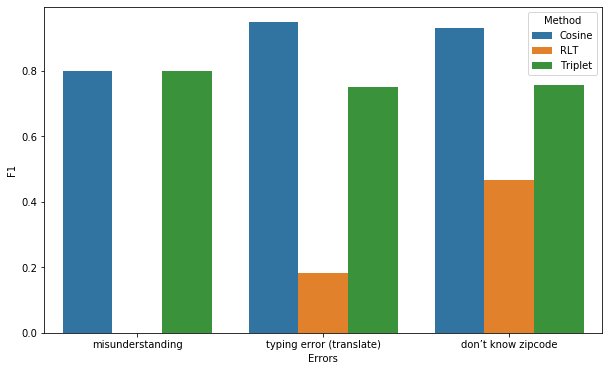

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Errors", hue="Method", y="F1", data=acc_df)
plt.show()

In [16]:
acc_df.index.values

array([('misunderstanding',), ('typing error (translate)',),
       ('don’t know zipcode',)], dtype=object)

[Text(0.5, 0, '%')]

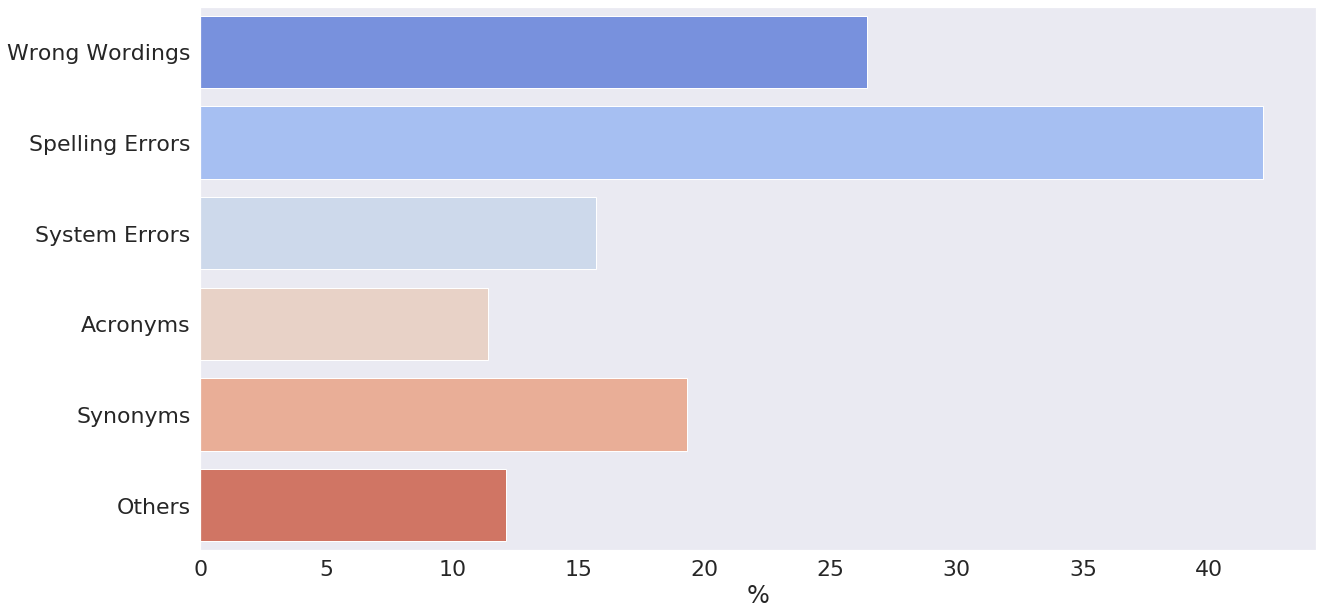

In [110]:
y = [26.4286, 42.1429, 15.7143, 11.4286, 19.2857, 12.1429]
x = [ 'Wrong Wordings', 'Spelling Errors', 'System Errors', 
     'Acronyms', 'Synonyms', 'Others']

import matplotlib.pyplot as plt


fig, ax = plt.subplots(1, 1, figsize=(20, 10))
plt.rcParams.update({'font.size': 25})
plt.grid()
# ax.bar(x=x, height=y)
ax = sns.barplot(x=y, y=x, palette=sns.color_palette("coolwarm", 6))
ax.set(xlabel='%')


[Text(0.5, 0, '%')]

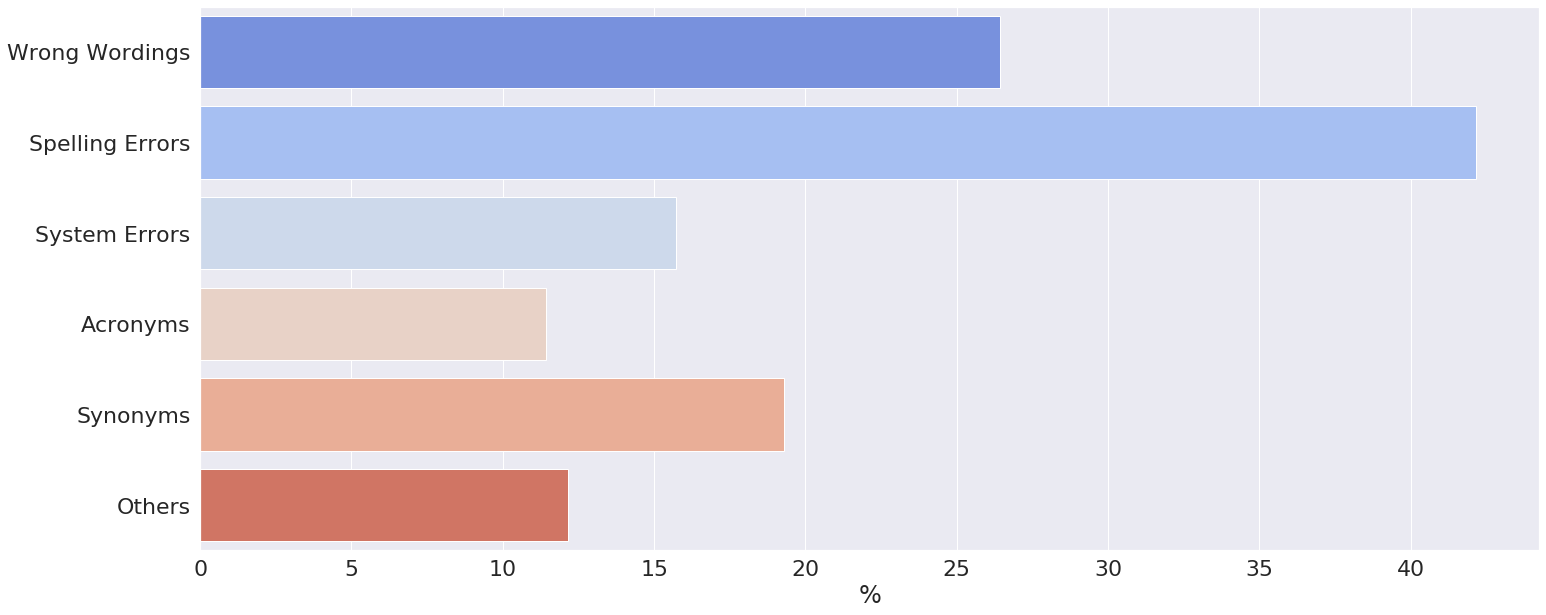

In [111]:
sns.set(rc={'figure.figsize':(24, 10)}, font_scale=2)
pic = sns.barplot(x=y, y=x, palette=sns.color_palette("coolwarm", 6))
pic.set(xlabel='%')

In [112]:
pic.get_figure().savefig("/data/dac/dedupe-project/image/mistakes.eps", format='eps', dpi=1200, quality=100)